In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df=pd.read_csv('student_grades_data.csv')

In [31]:
df.head()

Time_to_Study  Grades
0              1     1.5
1              5     2.7
2              7     3.1
3              3     2.1
4              2     1.8

In [32]:
len(df)

50

In [33]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [35]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

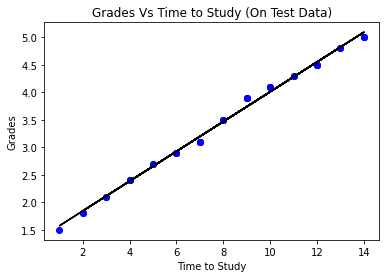

In [36]:
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, color='Blue')
plt.plot(X_train, lr.predict(X_train), color='Black')
plt.title('Grades Vs Time to Study (On Test Data)')
plt.xlabel('Time to Study')
plt.ylabel('Grades') #scatter plot of train data
plt.show()

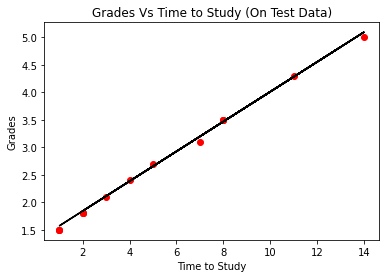

In [37]:
plt.scatter(X_test, y_test, color='Red')
plt.plot(X_train, lr.predict(X_train), color='Black')
plt.title('Grades Vs Time to Study (On Test Data)')
plt.xlabel('Time to Study')
plt.ylabel('Grades')
plt.show() #scatter plot of test data


In [38]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred)) #Mean Absolute Error

MAE 0.049272191185599085


In [39]:
from sklearn.metrics import mean_squared_error 
print("MSE",mean_squared_error(y_test,y_pred)) #Mean Squared error

MSE 0.003099226779172989


In [40]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred))) #Root Mean Square error

RMSE 0.055670699467251075


In [41]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2) #R2 Error

0.997283498148368


In [42]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred)))) # Root Mean Squared Log Error

RMSE -2.888301312338061


In [43]:
n=40
k=2
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score) # Adjusted R Squared

0.997136660210442


In [44]:
data=pd.read_csv('diabetes.csv')

In [45]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [49]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [50]:
feature_cols =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'] #split dataset in features and target variable
X = data[feature_cols]  
y = data.Outcome     

In [51]:
X

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [52]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [55]:
 y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [56]:
from sklearn.metrics import  confusion_matrix

In [58]:
confusion_matrix(y_test,y_pred)

array([[119,  27],
       [ 42,  43]], dtype=int64)

In [59]:
from sklearn.metrics import  accuracy_score      #Accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy_score(y_test,y_pred)                   #Accuracy is  percentage of cases that you have predicted correctly
                                                

0.7012987012987013

In [61]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)# Recall measure percentage of real positive cases are correctly identified.
# Recall = TP/(TP+FN)

0.5058823529411764

In [62]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred) # Precision measures that among the cases predicted to be positive, how much percentage of them are really positive.
# Precision = TP/(TP+FP)

0.6142857142857143

In [63]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred) # F1 Score is created to have a balanced metric between recall and precision.

0.5548387096774193